<a href="https://colab.research.google.com/github/carolynchep/NumericalAnalysis/blob/main/Exploring_Numerical_Integration_Simpson's_Rule_and_Cubic_Quadrature_for_Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group: Carolyne, Sokona, Cros, Jacob

1) Show that Simpson’s rule is exact for f(x) = x^3. In a sentence or two,

briefly state why this is somewhat of a surprise.


I think whats suprising is that although, we used the quadrature rule to work exactly for constant, linear, and quadratic functions, it's EXACt for a cubic function as well, I wonder why, because that's not the case for #3, even though we changed the formula

In [ ]:
#Simpsons rule
import numpy as np

def Simp(f,a,b,N):

  #create lin space
  x = np.linspace(a,b,N+1)

  #define delta x
  dx = x[1]-x[0]

  #create an array with the areas A_j
  #A=[]
  A= [(dx/6) * (f(x[1:])+4*f((x[1:] + x[:-1])/2) + f(x[:-1]))] #fill in this formula using lists!


  #sum up the areas A_j
  I=np.sum(A)
  return I

f = lambda x: x**3

a=0
b=3
N=10
#Trap(f,a,b,N)
Simp(f,a,b,N)

20.249999999999996

2) Replicate the process discussed in class to come up with a quadrature rule using piecewise cubic functions. Show all of the mathematics necessary to derive the algorithm.
\
\
We want to approximate the integral of our function $f(x)$ with $\int_{a}^{b} f(x) \,dx = A_{1}f(a) + A_{2}f(m_{1}) + A_{3}f(m_{2}) + A_{4}f(b)$ where $a$ is our start point, $b$ is our end point, $m_{1}$ is one third the distance between $a$ and $b$, and $m_{2}$ is two thirds the distance between $a$ and $b$. We can calculate $m_{1} = a+ \frac{1}{3}(b-a) = \frac{(2a+b)}{3}$ and $m_{2} = a+ \frac{2}{3}(b-a) = \frac{(a+2b)}{3}$ given that $b>a$. We're going to solve for $A_{1}, A_{2}, A_{3}, A_{4}$ by setting up a system of equations with the constant, linear, quadratic, and cubic approximations of $\int_{a}^{b} f(x) \,dx$ and using a 4x4 matrix to solve the system of equations.
\
\
Constant: \
$\int_{a}^{b} 1 \,dx = b-a$ \
$\int_{a}^{b} 1 \,dx = A_{1} + A_{2} + A_{3} + A_{4}$ \
\
Linear: \
$\int_{a}^{b} x \,dx = \frac{b^2}{2}-\frac{a^2}{2} = \frac{b^2-a^2}{2}$ \
$\int_{a}^{b} x \,dx = A_{1}(a) + A_{2}(\frac{(2a+b)}{3}) + A_{3}(\frac{(a+2b)}{3}) + A_{4}(b)$ \
\
Quadratic: \
$\int_{a}^{b} x^2 \,dx = \frac{b^3}{3}-\frac{a^3}{3} = \frac{b^3-a^3}{3}$ \
$\int_{a}^{b} x^2 \,dx = A_{1}(a^2) + A_{2}(\frac{(2a+b)}{3})^2 + A_{3}(\frac{(a+2b)}{3})^2 + A_{4}(b^2)$ \
\
Cubic: \
$\int_{a}^{b} x^3 \,dx = \frac{b^4}{4}-\frac{a^4}{4} = \frac{b^4-a^4}{4}$ \
$\int_{a}^{b} x^3 \,dx = A_{1}(a^3) + A_{2}(\frac{(2a+b)}{3})^3 + A_{3}(\frac{(a+2b)}{3})^3 + A_{4}(b^3)$ \
\
System of Equations: \
$b-a = A_{1} + A_{2} + A_{3} + A_{4}$ \
$\frac{b^2-a^2}{2} =  A_{1}(a) + A_{2}(\frac{(2a+b)}{3}) + A_{3}(\frac{(a+2b)}{3}) + A_{4}(b)$ \
$\frac{b^3-a^3}{3} = A_{1}(a^2) + A_{2}(\frac{(2a+b)}{3})^2 + A_{3}(\frac{(a+2b)}{3})^2 + A_{4}(b^2)$ \
$\frac{b^4-a^4}{4} = A_{1}(a^3) + A_{2}(\frac{(2a+b)}{3})^3 + A_{3}(\frac{(a+2b)}{3})^3 + A_{4}(b^3)$ \
\
We put this system of equations into a matrix and row reduce it to solve for $A_{1}, A_{2}, A_{3}, A_{4}$ as seen below.\
\
\begin{bmatrix}
1 & 1 & 1 & 1 & b-a \\
a & (\frac{(2a+b)}{3}) & (\frac{(a+2b)}{3}) & b & \frac{b^2-a^2}{2} \\
a^2 & (\frac{(2a+b)}{3})^2 & (\frac{(a+2b)}{3})^2 & b^2 & \frac{b^3-a^3}{3} \\
a^3 & (\frac{(2a+b)}{3})^3 & (\frac{(a+2b)}{3})^3 & b^3 & \frac{b^4-a^4}{4}
\end{bmatrix}
\
After row reduction, we got the following matrix: \
\
\begin{bmatrix}
1 & 0 & 0 & 0 & \frac{b-a}{8} \\
0 & 1 & 0 & 0 & \frac{3(b-a)}{8} \\
0 & 0 & 1 & 0 & \frac{3(b-a)}{8} \\
0 & 0 & 0 & 1 & \frac{b-a}{8}
\end{bmatrix}
\
This result means that
$A_{1} = \frac{b-a}{8}$, $A_{2} = \frac{3(b-a)}{8}$, $A_{3} = \frac{3(b-a)}{8}$, and $A_{4} = \frac{b-a}{8}$. Therefore we approximate our quadrature rule using piecewise cubic functions as: \
\
$\int_{a}^{b} f(x) \,dx = (\frac{b-a}{8})f(a) + (\frac{3(b-a)}{8})f(\frac{(2a+b)}{3}) + (\frac{3(b-a)}{8})f(\frac{(a+2b)}{3}) + (\frac{b-a}{8})f(b)$.

3) Check to see if your piecewise cubic approximate method derived in
the previous question is exact for 4th degree polynomials.

In [ ]:
import numpy as np
import math

def cubic(f,a,b):
  A_1 = (b-a)/8
  A_2 = 3*(b-a)/8
  A_3 = 3*(b-a)/8
  A_4 = (b-a)/8

  return A_1 * f(a) + A_2 * f((2*a+b)/3) + A_3 * f((a+2*b)/3) + A_4 * f(b)

f = lambda x: x**4 + 2*x**3 - 5*x**2 - 3*x + 4

cubic(f,1,4)

217.5

The exact integral of this function from $1$ to $4$ is $216.6$, so our cubic approximation is not exact for a 4th degree polynomial.

Question 4:

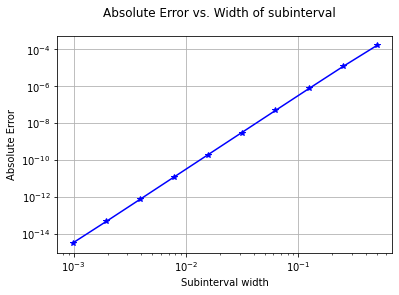

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_plot(f,a,b,N):
  x = np.linspace(a,b,N+1)
  h = x[1]-x[0]
  Area = []

  for i in range(N):
    a = x[i]
    b = x[i+1]

    A_1 = (b-a)/8
    A_2 = 3*(b-a)/8
    A_3 = 3*(b-a)/8
    A_4 = (b-a)/8

    Area.append( A_1 * f(a) + A_2 * f((2*a+b)/3) + A_3 * f((a+2*b)/3) + A_4 * f(b) )

  return sum(Area)


f = lambda x : np.exp(3*x)*np.sin(2*x)
exact = 3/13 * np.exp(3*np.pi/4) + 2/13
cubic_plot(f,0,np.pi/4,10)

H = 2.0**np.arange(1,11)
AbsPctError = []

for h in H:
  approx = cubic_plot(f,0,np.pi/4,int(h))
  AbsPctError.append(np.abs(approx-exact)/exact)

plt.loglog(H**(-1) , AbsPctError, 'b-*')
plt.grid()
plt.suptitle("Absolute Error vs. Width of subinterval")
plt.xlabel("Subinterval width")
plt.ylabel("Absolute Error")
plt.show()

The approximate order of error for this method seems to be four based on this plot because the absolute error falls four times as fast as the subinterval width on a loglog plot.

5) In a few sentences, discuss the following statement found on the Wikipedia
page for numerical quadrature: "In practice, since polynomials of very high degree tend to oscillate wildly, only polynomials of low degree are used, typically linear and quadratic." \
\
An n-th degree polynomial can have up to n-1 turning points. A linear function has no turning points, a quadratic function has one turning point (concave up vs down), a cubic function has up to two changes in concavity, etc. Higher degree polynomials can oscillate more wildly over small intervals because they have more potential turning points, and this oscillation makes estimating with them more complicated. Linear and quadratic polynomials are used more often for quadrature because linear and quadratic functions are less eratic.